In [1]:
words = [w for w in open('names.txt', 'r').read().splitlines() if w.strip()]


In [2]:
words[:10]

['frazier',
 'miller',
 'gilbert',
 'ward',
 'arnold',
 'saunders',
 'mcdaniel',
 'collins',
 'thompson',
 'gibson']

In [3]:
len(words)

46654

In [4]:
min(len(w) for w in words)

2

In [5]:
max(len(w) for w in words)

11

In [6]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']    
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1


In [7]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('n', '<E>'), 10167),
 (('s', '<E>'), 9674),
 (('e', 'r'), 8027),
 (('o', 'n'), 7900),
 (('a', 'r'), 5398),
 (('<S>', 'm'), 4970),
 (('l', 'l'), 4813),
 (('a', 'n'), 4679),
 (('r', '<E>'), 4626),
 (('s', 'o'), 4557),
 (('<S>', 's'), 4105),
 (('l', 'e'), 3875),
 (('<S>', 'b'), 3742),
 (('<S>', 'h'), 3708),
 (('<S>', 'w'), 3680),
 (('z', '<E>'), 3612),
 (('<S>', 'c'), 3337),
 (('i', 'n'), 3267),
 (('<S>', 'r'), 3250),
 (('e', '<E>'), 3158),
 (('e', 'z'), 3069),
 (('e', 'n'), 3063),
 (('r', 'o'), 3004),
 (('i', 'l'), 3003),
 (('n', 'e'), 2943),
 (('r', 'e'), 2908),
 (('n', 's'), 2763),
 (('o', 'r'), 2732),
 (('a', 'l'), 2668),
 (('e', 's'), 2627),
 (('<S>', 'g'), 2623),
 (('r', 'i'), 2548),
 (('y', '<E>'), 2529),
 (('h', 'a'), 2504),
 (('m', 'a'), 2426),
 (('m', 'i'), 2425),
 (('<S>', 'j'), 2395),
 (('<S>', 'p'), 2303),
 (('e', 'l'), 2258),
 (('r', 'a'), 2184),
 (('t', 'e'), 2057),
 (('i', 's'), 2028),
 (('<S>', 'l'), 2002),
 (('r', 't'), 1999),
 (('a', 'm'), 1971),
 (('r', 'r'), 1953),

In [8]:
import torch

In [9]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [10]:
"""
chars = sorted(list(set(''.join(words))))
stoi = {s:i for i,s in enumerate(chars)}
stoi['<S>'] = 26
stoi['<E>'] = 27
"""

"\nchars = sorted(list(set(''.join(words))))\nstoi = {s:i for i,s in enumerate(chars)}\nstoi['<S>'] = 26\nstoi['<E>'] = 27\n"

In [11]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [12]:
for w in words:
    #chs = ['<S>'] + list(w) + ['<E>']
    chs = ['.'] + list(w) + ['.']    
    
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
import numpy as np

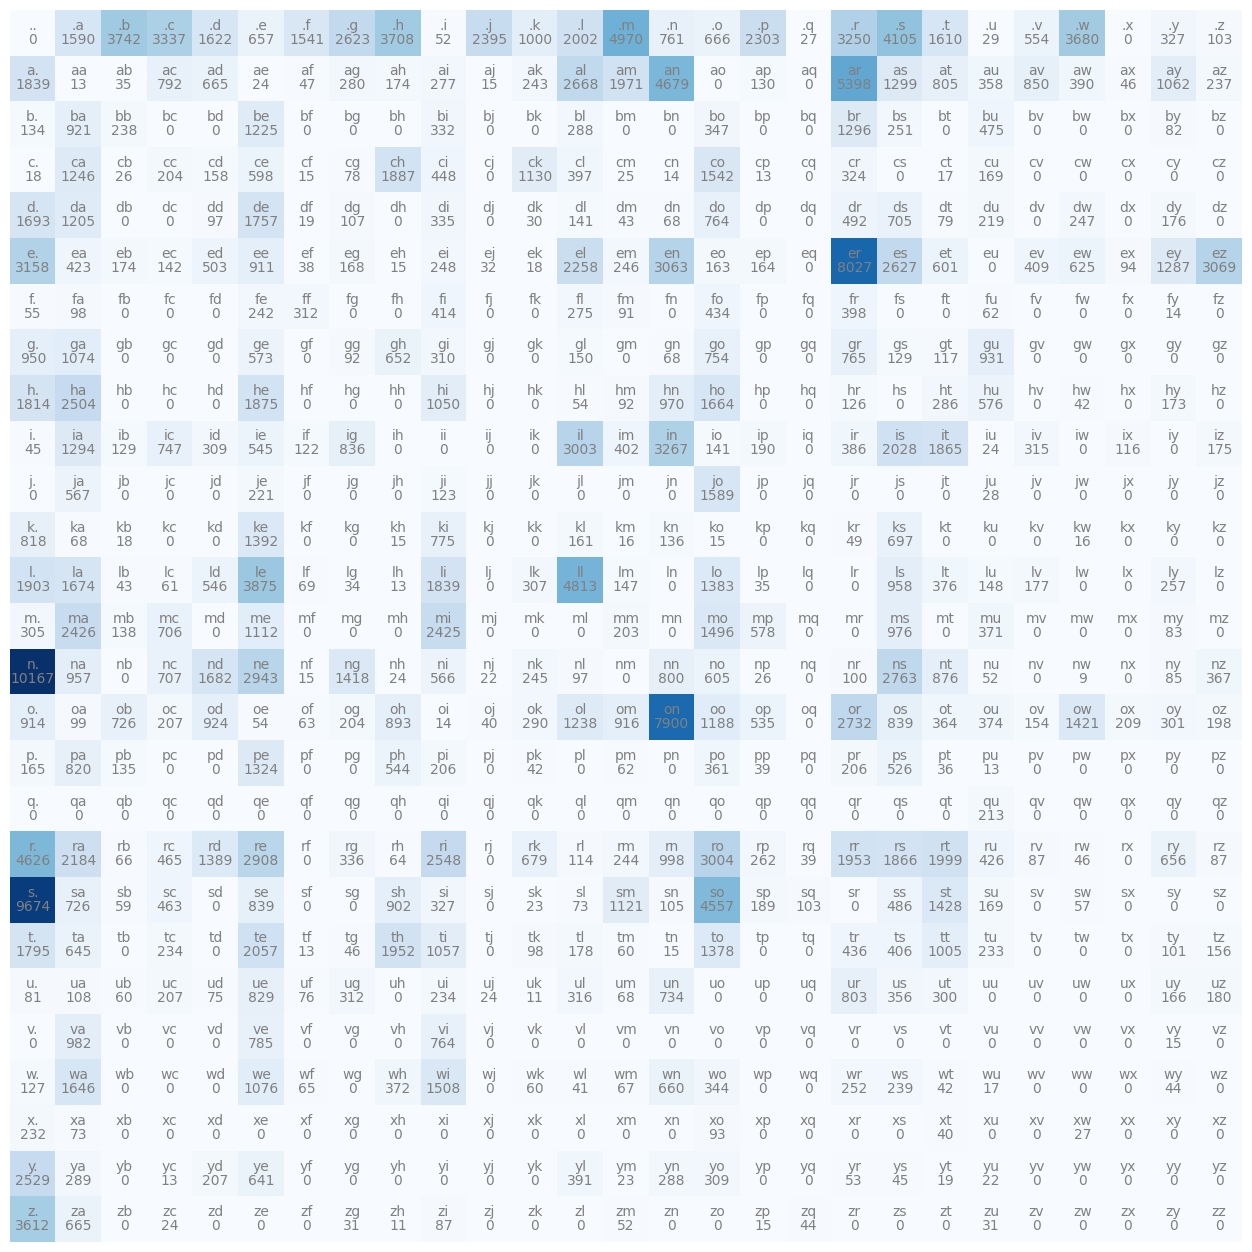

In [15]:
plt.figure(figsize=(16, 16))
plt.imshow(N, cmap = 'Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color="gray")
plt.axis('off');

In [16]:
N[0]

tensor([   0, 1590, 3742, 3337, 1622,  657, 1541, 2623, 3708,   52, 2395, 1000,
        2002, 4970,  761,  666, 2303,   27, 3250, 4105, 1610,   29,  554, 3680,
           0,  327,  103], dtype=torch.int32)

#### Normalizing Counts to Probabilities
- For sampling, raw counts are not enough; we need to convert them into probabilities.
- To obtain probabilities, one has to normalize the counts such that the sum of probabilities in each row equals 1.

p = n/sum(n)

In [17]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.0341, 0.0802, 0.0715, 0.0348, 0.0141, 0.0330, 0.0562, 0.0795,
        0.0011, 0.0513, 0.0214, 0.0429, 0.1065, 0.0163, 0.0143, 0.0494, 0.0006,
        0.0697, 0.0880, 0.0345, 0.0006, 0.0119, 0.0789, 0.0000, 0.0070, 0.0022])

In [18]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples = 1, replacement=True, generator=g).item()
itos[ix]

'j'

In [19]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator = g)
p = p / p.sum()
p 

tensor([0.6064, 0.3033, 0.0903])

#### Sampling Using PyTorch's Multinomial Function
- To sample according to a given probability distribution, **PyTorch's torch.multinomial function** is employed.
This function returns samples from a *multinomial probability distribution*.
- A **generator object** in PyTorch can be used to make the random sampling deterministic.

In [20]:
torch.multinomial(p, num_samples = 100, replacement= True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0,
        0, 1, 1, 1])

In [21]:
p.shape

torch.Size([3])

Samplaling new names/words

In [22]:
g = torch.Generator().manual_seed(2147483647)

for i in range(20):
    out = []
    ix = 0
    while True:
        p = N[ix].float()
        p = p / sum(p)

        #p = torch.ones(27) / 27.0     #this is untrained model, every thing is equally likely. complete garbage.

        ix = torch.multinomial(p, num_samples = 1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))


jonided.
ps.
gar.
pson.
roon.
wa.
shin.
toleras.
gez.
bs.
hntauy.
bileviackibyainrwimolls.
jowery.
artez.
frtumerifontumerponts.
walezan.
rcore.
y.
ez.
cker.


above here! ⬆⬆⬆

#### issues with a **Bigram Model** is -
- Sampling from a bigram model can produce nonsensical results because the model *only considers the immediate previous character*.
- Despite its simplicity and speed, bigram models might not generate realistic sequences.


---

In [23]:
# Perparing Matrix 'P', whcih will have all the calculated probablities in it.

In [25]:
P = N.float()
P /= P.sum(1, keepdim=True) 

In [26]:
P.shape

torch.Size([27, 27])

In [27]:
 P.sum(1, keepdim=True).shape 

torch.Size([27, 1])

#### PyTorch Broadcasting

Two tensors are “broadcastable” if the following rules hold:
0. Aling all the dimensions on the right
1. Each tensor has at least one dimension.
2. When iterating over the dimension sizes, starting at the trailing dimension, the dimension sizes must 
    - **either be equal**
    - **one of them is 1**
    - **one of them does not exist**



In [28]:
# 27, 27
# 27,  1

# After broadcasting - 

# 27, 27
# 27, 27


If two tensors x, y are “broadcastable”, the resulting tensor size is calculated as follows:
1. If the number of dimensions of x and y are not equal, prepend 1 to the dimensions of the tensor with fewer dimensions to make them equal length.
2. Then, for each dimension size, the resulting dimension size is the max of the sizes of x and y along that dimension.

In [29]:
P = N.float()
P /= P.sum(1, keepdim=True) 

In [30]:
# Normalised 

P[0].sum()

tensor(1.)

In [31]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    out = []
    ix = 0
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples = 1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))


jonided.
ps.
gar.
pson.
roon.


#### Pytorch's Broadcasting Common Pitfall
- When performing operations like division between two tensors, broadcasting might replicate rows or columns in unexpected ways, leading to incorrect results.
- The *keepdim* argument in functions like *torch.sum* can be critical to ensure the desired broadcasting behavior. *

---

Evaluating the qulity of the Model
- GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling)
- equivalent to maximizing the log likelihood (because log is monotonic)
- equivalent to minimizing the negative log lokelihood
- equivalent to minimizing the average negative log likelihood (lower this number is the better the model is)

log(a*b*c) = log(a) + log(b) + log(c)

In [32]:
log_likelihood = 0.0
n = 0

for w in words:
#for w in ["ayush"]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        #print(f'{ch1}{ch2}:{prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

log_likelihood=tensor(-761791.1250)
nll=tensor(761791.1250)
2.308919668197632


-----

#### Neural Network Bigram Character Language Model

In [33]:
# create the training set of bigrams (x, y)

xs, ys = [], []
 
for w in words[:1]:
    chs = ['.'] + list(w) + ['.']    
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1, ch2)        
        xs.append(ix1) 
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

. f
f r
r a
a z
z i
i e
e r
r .


In [34]:
xs

tensor([ 0,  6, 18,  1, 26,  9,  5, 18])

In [35]:
ys

tensor([ 6, 18,  1, 26,  9,  5, 18,  0])

#### torch.Tensor is a class, whereas torch.tensor is a function. 
They both create tensors, but there are some differences in their behavior and use cases.

- **torch.Tensor (class constructor):**

    It creates an uninitialized tensor of the specified size.
    The data type of the tensor is inferred from the default data type (torch.get_default_dtype()), which is initially set to torch.float32.
    It is often used when you need a tensor of a specific size but don't have the data yet.

        Example:
        a = torch.Tensor(2, 3) # Creates an uninitialized tensor of size (2, 3)

- **torch.tensor (function):**

    It creates a tensor from the provided data (e.g., a list, a NumPy array, or another tensor).
    The data type of the tensor is inferred from the input data, or you can explicitly set it using the dtype argument.
    It is often used when you already have the data and want to create a tensor with that data.
        Example:

        data = [1, 2, 3]
        b = torch.tensor(data) # Creates a tensor with the data from the list

In general, you should use torch.tensor when you have the data available and want to create a tensor with that data. Use torch.Tensor when you need to create an uninitialized tensor of a specific size. However, for most use cases, torch.tensor is the preferred way to create tensors as it provides more control over the data type and other attributes of the tensor.

In [36]:
xs.dtype

torch.int64

#### Encoding Integers in Vectors by On-Hot Encoding

One-hot encoding is a common way to transform categorical variables into a format that can be provided to a machine learning algorithm. In one-hot encoding, we convert each integer into a binary vector with all zero values except for the index of the integer, which is marked with a 1.

In [37]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes = 27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1., 0., 0., 0., 0., 0

In [38]:
# One-Hot in Pytorch does not support directly converting datatype as argument.
# e.g. xenc = F.one_hot(xs, num_classes = 27, dtype=torch.float32) -> not applicable
# instead we can do -> xenc = F.one_hot(xs, num_classes = 27).float()


In [39]:
xenc.shape

torch.Size([8, 27])

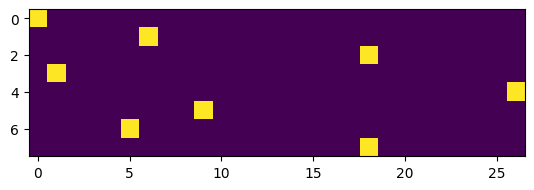

In [40]:
plt.imshow(xenc)

# 0,  6, 18,  1, 26,  9,  5, 18 - bits are turned on

In [41]:
xenc.dtype

torch.float32

Counstructing 1st Neuron

In [42]:
W = torch.randn((27, 1))
xenc @ W

# (8, 27) @ (27, 1) -> (8, 1)

# The @ operator is the most straightforward way to perform matrix multiplication in Pytorch

tensor([[-5.4512e-02],
        [-6.0316e-01],
        [-1.4612e+00],
        [-3.0335e-04],
        [ 6.6300e-01],
        [ 2.4249e+00],
        [-2.7300e-01],
        [-1.4612e+00]])

In [43]:
W = torch.randn((27, 27))
xenc @ W

# (8, 27) @ (27, 27) -> (8, 27)


tensor([[ 0.0178, -0.2492, -0.3782, -0.3667, -0.1622, -0.1644, -1.2259, -1.6968,
         -1.8958,  1.0628,  0.2648, -0.6426,  0.9536,  0.3900,  0.4695, -0.7103,
          0.2391, -0.6578,  1.7216,  0.7757,  0.1557,  1.6649, -0.9756, -1.6459,
          1.4340, -0.1683, -0.8474],
        [-0.2801,  1.5162, -0.2275,  1.3806,  1.0609, -1.9579,  1.5754,  0.1908,
          0.4851,  0.6479,  0.7982,  1.1132, -0.3680, -1.5823, -0.5049, -0.1353,
          0.7696,  1.4217, -0.7614,  0.6764, -1.7279, -1.0234,  0.7253,  0.0880,
         -1.0921,  1.3216,  0.0444],
        [-1.2201,  0.2930, -0.4709, -1.9675, -1.1354,  1.0751, -0.8175,  1.5161,
         -2.0410, -0.6356,  1.0685,  0.2688,  0.3398, -1.2893,  0.9569, -0.0084,
          1.1361,  1.1732, -1.5593, -0.5575,  0.6455, -0.0431,  1.1114, -1.6360,
          0.7175, -1.1036,  1.3227],
        [-0.6676, -0.7878, -1.1172,  0.1375,  1.3115, -0.9136,  0.7386,  1.0730,
         -0.0776,  1.2347,  1.5969,  1.8191,  1.2206,  1.3637, -1.0765, -1.9919

In [44]:
(xenc @ W).shape

torch.Size([8, 27])